# Análisis de Procesamiento de Lenguaje Natural (PLN)

## Exercise 1
Dado el conjunto de datos de reseñas, podemos responder preguntas como:
- ¿Cuáles son los factores más importantes que generan críticas negativas?
- ¿Un cambio de política reciente mejoró nuestras revisiones?

Sin embargo, para responder preguntas más específicas, como:
- ¿Cuál es la tendencia de las críticas a lo largo del tiempo?
necesitaríamos datos adicionales como información temporal.

# Tokenizacion  #
Proceso en el cual se realiza la separacion por palabras de todos las reseñas. 


In [4]:
import nltk
import pandas as pd

nltk.download('punkt')
nltk.download('punkt_tab')

# Cargar el archivo CSV
data = pd.read_csv('../data/sdata.csv', nrows=5000)  # Cargar las primeras 5000 filas
allReviews = data['text']  # Extraer la columna de texto

tokesReview ={}#arreglo de tokens

for iterador, review in enumerate(allReviews):
    
    # Tokenizar la reseña
    tokens = nltk.word_tokenize(review)
    review_id = data.iloc[iterador]['review_id']

    # Asignar los tokens a su 'review_id' correspondiente
    tokesReview[review_id] = tokens

    # Incrementamos el iterador
    iterador += 1

[nltk_data] Downloading package punkt to C:\Users\MARTHA ISABEL
[nltk_data]     VILLAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\MARTHA ISABEL
[nltk_data]     VILLAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Exercise 2 #
Realizar un análisis exploratorio de los tamaños de las reseñas: encontrar la más corta y la más larga y trazar un histograma de la distribución de las longitudes de las reseñas.

Reseña más corta (longitud 6 palabras):
6

Reseña más larga (longitud 1105 palabras):
1105



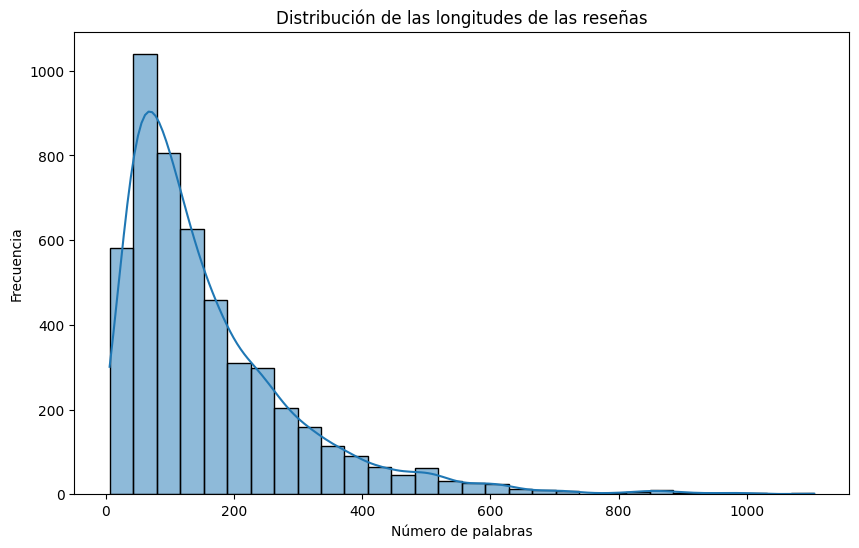

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Añadir una nueva columna 'review_length' utilizando el diccionario 'tokesReview'
data['review_length'] = data['review_id'].apply(lambda review_id: len(tokesReview[review_id]))

# Encontramos la reseña más corta y la más larga y extraemos su tamaño
shortest_review = data.loc[data['review_length'].idxmin()]['review_length']
longest_review = data.loc[data['review_length'].idxmax()]['review_length']

print(f"Reseña más corta (longitud {data['review_length'].min()} palabras):\n{shortest_review}\n")
print(f"Reseña más larga (longitud {data['review_length'].max()} palabras):\n{longest_review}\n")

# Graficar el histograma de longitudes de reseñas
plt.figure(figsize=(10,6))
sns.histplot(data['review_length'], bins=30, kde=True)
plt.title("Distribución de las longitudes de las reseñas")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()


## Exercise 3
Crear una función `word_cloud_rating(data, star_value)` para construir una nube de palabras a partir de las reseñas que tienen un valor específico de estrellas. Visualizar los resultados para reseñas de 1 estrella.

In [6]:
from nltk.corpus import stopwords  # Asegúrate de importar el corpus de stopwords

nltk.download('stopwords')

# Eliminamos los stopwords en inglés
stop_words = set(stopwords.words('english'))  # Cambia 'english' por el idioma que corresponda
tokens_clean = [word for word in tokens if word.lower() not in stop_words]

[nltk_data] Downloading package stopwords to C:\Users\MARTHA ISABEL
[nltk_data]     VILLAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Exercise 4
Investigar por qué la palabra 'good' aparece con frecuencia en las reseñas negativas y proporcionar una explicación razonable.

## Exercise 5
Encontrar todas las palabras de alta frecuencia (top 1%) y de baja frecuencia (bottom 1%) en las reseñas en general usando la función `Counter()` de la clase `collections`.

## Exercise 6
Escribir una función llamada `top_k_ngrams(word_tokens, n, k)` para imprimir los principales k n-gramas. Usar esta función para obtener los principales 10 1-gramas, 2-gramas y 3-gramas de las primeras 1000 reseñas.

## Exercise 7.1
Filtrar todas las stop words en la primera reseña de los datos de Yelp y mostrar la respuesta, así como las stop words encontradas.

## Exercise 7.2
Modificar la función `top_k_ngrams(word_tokens, n, k)` para eliminar las stop words antes de determinar los n-gramas.

## Exercise 8.1
Dividir los datos en 'buenas reseñas' (rating de estrellas mayor a 3) y 'malas reseñas' (rating de estrellas menor o igual a 3) y hacer un gráfico de barras de las 20 palabras principales en cada caso.

## Exercise 8.2
Usar la función `get_top_n_words()` para encontrar los 20 principales bigramas y trigramas (en malas y buenas reseñas). Evaluar si los resultados son útiles.

## Exercise 9.1
Observar que muchos de los importantes bigramas 'malos' incluyen las palabras 'like' o 'just'. Dar ideas sobre cómo utilizar esta observación en el futuro preprocesamiento de las reseñas.

## Exercise 9.2
1. Escribir una queja que probablemente no se capte completamente mediante el análisis de bigramas.
2. Escribir un paso de procesamiento que solucione este problema.